In [63]:
import ast
import numpy as np
import math
from io import StringIO   # StringIO behaves like a file object

# Example string representation of a list of arrays
s = [[-1.6, 1.6], [0.0, 0.2], [1.6, -1.5], [-0.3904283036630054, 1.7733954694075118], [1.9216251513618485, -0.7582546883209562], [-1.314560142568316, -1.2063138664089443]]

r = [math.dist([-1.6, 1.6], i) for i in s]

# Convert the string to a list using ast.literal_eval()
#list_of_arrays = ast.literal_eval(string_list_of_arrays)
test = np.array(s)

# Convert each element of the list to a numpy array
#list_of_arrays = [np.array(arr) for arr in list_of_arrays]
a = np.array([-1.6, 1.6])

f = np.argwhere(test==a)[0][0]
p = np.delete(s, np.argwhere(test==a)[0][0], axis=0)
print(f, p, p.shape, test.shape)
temp = [np.sqrt(np.sum(np.square(a - other_pos))) 
                    for other_pos in p]
print(r, "\n", temp)
# Shorter and returns the same values
temp2 = np.linalg.norm(a-p, axis=1)
print(r, "\n", temp2)


0 [[ 0.          0.2       ]
 [ 1.6        -1.5       ]
 [-0.3904283   1.77339547]
 [ 1.92162515 -0.75825469]
 [-1.31456014 -1.20631387]] (5, 2) (6, 2)
[0.0, 2.12602916254693, 4.455333881989093, 1.2219368549113354, 4.238302594399335, 2.8207930496599247] 
 [2.12602916254693, 4.455333881989093, 1.2219368549113354, 4.238302594399335, 2.8207930496599247]
[0.0, 2.12602916254693, 4.455333881989093, 1.2219368549113354, 4.238302594399335, 2.8207930496599247] 
 [2.12602916 4.45533388 1.22193685 4.23830259 2.82079305]


In [48]:
# Tester for cohesion computation equation
t = np.array([2.61527602, 0.97435475, 2.11814372, 0.02357945, 0.16845774])
print(t.dtype)
size = 0.15
scaler = 1
r = np.where((t-size)<0, 0, t-size)
p = 1 / (1 + r * scaler)
print(r)
print(p)

float64
[2.46527602 0.82435475 1.96814372 0.         0.01845774]
[0.2885773  0.54813901 0.33691091 1.         0.98187677]


In [6]:
# Tester for array sorting based on norm
import numpy as np

def l2_norm(vector):
    return np.linalg.norm(vector)

def sort_by_l2_norm(vals, length, pad_value=[0,0]):

    norms = [np.linalg.norm(val) for val in vals]
    pairs = list(zip(vals, norms))
    sorted_pairs = sorted(pairs, key=lambda x: x[1])
    temp = [pair[0] for pair in sorted_pairs]

    temp = temp[:length] + [np.array(pad_value)] * max(0, length - len(temp))
    
    return temp

# Example usage:
vectors = [
    np.array([1, 2, 3]),
    np.array([4, 5, 6]),
    np.array([1, 1, 1])
]


temp = np.array([[9,12], [3, 4], [6,8],[12,16]])

sorted_vectors = sort_by_l2_norm(temp, 3)
sorted_vectors


[array([3, 4]), array([6, 8]), array([ 9, 12])]

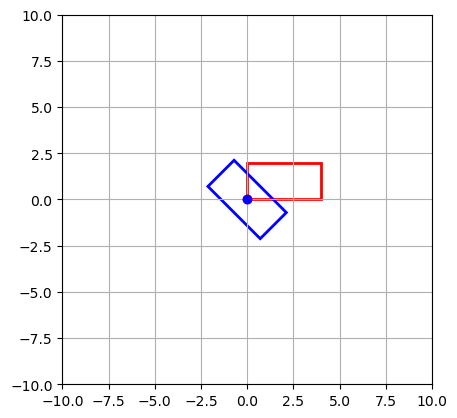

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def rotate_and_find_new_bottom_left(p, width, height, angle):
    # Define the original rectangle corners
    original_corners = np.array([
        p,
        [p[0] + width, 0],
        [p[0] + width, p[1] + height],
        [0, p[1] + height]
    ])
    
    # Calculate the centroid of the original rectangle
    centroid = np.array([width / 2, height / 2])
    
    # Translate corners to origin (centroid to origin)
    translated_corners = original_corners - centroid
    
    # Define the rotation matrix
    theta = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    
    # Rotate the corners around the origin
    rotated_corners = np.dot(translated_corners, rotation_matrix)
    
    # Calculate the new position of the bottom-left corner
    # The new bottom-left corner is the position where the bottom-left corner would be if the centroid is at the origin
    new_bottom_left = -rotated_corners.mean(axis=0)
    
    # Apply the translation to get final corners
    final_corners = rotated_corners + new_bottom_left
    
    return new_bottom_left, final_corners

# Plot the original and transformed rectangle
def plot_rectangles(original_corners, final_corners, new_bottom_left):
    fig, ax = plt.subplots()
    
    # Original rectangle (before rotation)
    original_rect = patches.Polygon(original_corners, closed=True, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(original_rect)
    
    # Rotated and translated rectangle
    transformed_rect = patches.Polygon(final_corners, closed=True, fill=None, edgecolor='b', linewidth=2)
    ax.add_patch(transformed_rect)
    
    # Original and new bottom-left corners
    ax.plot(0, 0, 'ro')  # Original bottom-left corner
    ax.plot(new_bottom_left[0], new_bottom_left[1], 'bo')  # New bottom-left corner
    
    # Set limits and show plot
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal', 'box')
    plt.grid(True)
    plt.show()

# Rectangle dimensions
width = 4
height = 2
angle = 45  # Rotation angle in degrees

# Get original and transformed rectangle corners
original_corners = np.array([
    [0, 0],
    [width, 0],
    [width, height],
    [0, height]
])
new_bottom_left, final_corners = rotate_and_find_new_bottom_left([0,0], width, height, angle)

# Plot the rectangles
plot_rectangles(original_corners, final_corners, new_bottom_left)


In [6]:
import numpy as np

allx = [0.5, 0.4, 0.55, 0.5, 0.6]
ally = [0.8, 0.8, 0.7, 0.6, 0.65]
step = 0.01
dec = len(str(step).split('.')[1])

px, py = [], []
for id, (x,y) in enumerate(zip(allx, ally)):
    if id == 0:
        allx.append(x)
        ally.append(y)
        continue
    old_x, old_y = allx[id-1], ally[id-1]
    num_x = max(2, int(abs(x-old_x)/step))
    num_y = max(2, int(abs(y-old_y)/step))
    
    valx = np.round(np.linspace(old_x, x, num=num_x), dec)[1:]
    valy = np.round(np.linspace(old_y, y, num=num_y), dec)[1:]

    if num_x != num_y:

        diff = abs(num_x - num_y)
        pad = diff//2
        rem = diff%2
        if num_x > num_y:
            valy = np.pad(valy, (pad, pad+rem), 'edge')
        else:
            valx = np.pad(valx, (pad, pad+rem), 'edge')
        print(len(valx), len(smooth_data(valx.tolist())))
    px.extend(valx.tolist())
    py.extend(valy.tolist())

print(len(px), len(py))

8 8
14 14
8 8
8 8
14 14
52 52


In [4]:
def smooth_data(data, window_size=2):
    """
    Smooths the data using a moving average.

    Parameters:
    - data: List of numeric values representing the input data.
    - window_size: Integer representing the size of the window for smoothing.

    Returns:
    - smoothed_data: List of smoothed data points.
    """
    smoothed_data = []

    # Apply smoothing to the data points
    for i in range(len(data)):
        # Calculate the smoothed value using the window size
        start_index = max(0, i - window_size)
        end_index = min(len(data), i + window_size + 1)
        smoothed_value = sum(data[start_index:end_index]) / (end_index - start_index)
        smoothed_data.append(smoothed_value)

    return smoothed_data

In [3]:
def map_centroid(x, y, w, h, rw, rh, x_min, y_min, x_max, y_max):
    # Calculate the centroid of the original rectangle
    centroid_x = x + w / 2
    centroid_y = y + h / 2

    # Normalize the centroid coordinates (assuming the original rectangle ranges from (0, 0) to (width, height))
    u = centroid_x / rw
    v = 1 - centroid_y / rh

    # Apply scaling and translation to map to the new coordinate system
    mapped_centroid_x = x_min + u * (x_max - x_min)
    mapped_centroid_y = y_min + v * (y_max - y_min)

    return mapped_centroid_x, mapped_centroid_y

# Example parameters for the original rectangle
x, y = 5, 10  # Bottom-left corner
w, h = 20, 15  # Width and height

# New coordinate system
x_min, y_min = -2, -2
x_max, y_max = 2, 2

# Map the centroid
mapped_centroid = map_centroid(x, y, w, h, 704, 704, x_min, y_min, x_max, y_max)

# Print the results
print("Original Centroid:", (x + w / 2, y + h / 2))
print("Mapped Centroid:", mapped_centroid)


Original Centroid: (15.0, 17.5)
Mapped Centroid: (-1.9147727272727273, 1.9005681818181817)


In [4]:
names = ["agents", "landmarks", "landmarks", "agents"]
track_ids = [1, 0, 2, 3]

def name_id_map(names, track_ids):
    # Initialize a counter dictionary for each unique name
    counter = {name: 0 for name in set(names)}

    # Create the name_id_map with formatted keys and corresponding track_ids
    name_id_map = {}
    for name, track_id in zip(names, track_ids):
        formatted_name = f"{name}_{counter[name]}"
        name_id_map[formatted_name] = track_id
        counter[name] += 1

    return name_id_map


{'agents_0': 1, 'landmarks_0': 0, 'landmarks_1': 2, 'agents_1': 3}


In [7]:
import sys
sys.path.append("/home/ayomide/OneDrive/MARL_git")
from util import util

attrs = dir(util)
env = "mpe"
temp = [attr for attr in attrs if f"{env}_world" in attr]
print(getattr(util, temp[0]))

/home/ayomide/OneDrive/MARL_git/files/datasets/mpe/world


In [18]:
import torch

# Load the state dictionary from the .pt file
state_dict = torch.load('/home/ayomide/OneDrive/MARL_git/files/marl/mappo/10x10/obst/experts/obst/models/actor.pt')
#state_dict = torch.load('/home/ayomide/OneDrive/MARL_git/files/marl/mappo/10x10/agg/experts/run1/models/actor.pt', map_location=torch.device('cpu'))
#state_dict = torch.load('/home/ayomide/OneDrive/MARL_git/files/marl/mappo/10x10/obst/policies/gail_f_10000/e_0.0_1_400/models/actor.pt')

# Print the state dictionary keys
print("State Dict Keys:")
print(state_dict.keys())

# Print the state dictionary values (parameter tensors and their sizes)
print("State Dict Values:")
for param_tensor in state_dict:
    print(param_tensor, "\t", state_dict[param_tensor].size())


State Dict Keys:
odict_keys(['base.feature_norm.weight', 'base.feature_norm.bias', 'base.mlp.fc1.0.weight', 'base.mlp.fc1.0.bias', 'base.mlp.fc1.2.weight', 'base.mlp.fc1.2.bias', 'base.mlp.fc_h.0.weight', 'base.mlp.fc_h.0.bias', 'base.mlp.fc_h.2.weight', 'base.mlp.fc_h.2.bias', 'base.mlp.fc2.0.0.weight', 'base.mlp.fc2.0.0.bias', 'base.mlp.fc2.0.2.weight', 'base.mlp.fc2.0.2.bias', 'act.action_out.linear.weight', 'act.action_out.linear.bias'])
State Dict Values:
base.feature_norm.weight 	 torch.Size([12])
base.feature_norm.bias 	 torch.Size([12])
base.mlp.fc1.0.weight 	 torch.Size([64, 12])
base.mlp.fc1.0.bias 	 torch.Size([64])
base.mlp.fc1.2.weight 	 torch.Size([64])
base.mlp.fc1.2.bias 	 torch.Size([64])
base.mlp.fc_h.0.weight 	 torch.Size([64, 64])
base.mlp.fc_h.0.bias 	 torch.Size([64])
base.mlp.fc_h.2.weight 	 torch.Size([64])
base.mlp.fc_h.2.bias 	 torch.Size([64])
base.mlp.fc2.0.0.weight 	 torch.Size([64, 64])
base.mlp.fc2.0.0.bias 	 torch.Size([64])
base.mlp.fc2.0.2.weight 	 tor